<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رمزگشایی از روایت‌های خاموش: نجات دادن جوانان از چنگال خودکشی
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این چالش، شما به عنوان یک دانشمند داده با قلبی مشتاق برای نجات جان‌ها، ماموریت دارید که داده‌های گزارش‌دهی ملی مرگ‌های خشونت‌آمیز را تجزیه و تحلیل کنید. این داده‌ها شامل خلاصه‌ای از گزارش‌های انتظامی و پزشکی قانونی می‌باشد که مربوط به خودکشی‌های انجام‌شده توسط جوانان است. هدف از این تجزیه و تحلیل، شناسایی عوامل کلیدی است که می‌تواند به پیشگیری از خودکشی در آینده کمک کند.
داده‌های ارائه‌شده شامل روایت‌های مختلف و غیرقابل شناسایی است که توسط کارشناسان دولتی تهیه شده‌اند. این داده‌ها خلاصه‌ای از ماجراهای تلخی هستند که باید با دقت و حساسیت بررسی شوند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mahbod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل ۳۰۰۰ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|uid|شناسه‌ی یکتای هر مورد|
|NarrativeLE|گزارش خلاصه‌ای از اطلاعات مامور قانون|
|NarrativeCME|خلاصه‌ای از اطلاعات گزارش پزشک قانونی/معاینه‌کننده پزشکی|
|DepressedMood|در آن زمان افسرده بوده یا خیر (۰ یا ۱)|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آزمایش نیز مانند مجموعه آموزش است با این تفاوت که ستون <code>DepressedMood</code> که متغیر هدف مسئله است را در خود ندارد. مجموعه داده آزمایش ۵۰۰ سطر دارد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [2]:
train_path = 'F:\deep_learning\suicide_quera\\train.csv'
train_data = pd.read_csv(train_path)
train_data

,uid,NarrativeLE,NarrativeCME,DepressedMood
0,astm,V was a XX XX found unresponsive and hanging i...,V was a XX XX found unresponsive and hanging i...,0
1,eqeq,The V is an XX XX. The V called his girlfriend...,DC NOTES: EVIDENCE OF RECENT ALCOHOL USE; RECE...,1
2,arpf,V is a XX XX who died by suicide via multiple ...,V is a XX XX who died by suicide via multiple ...,0
3,ffal,Police were dispatched for a sick assist/ poss...,V is a XX XX who was found unresponsive in an ...,0
4,dyqf,Victim XX died of unspecified causes with an u...,Victim XX XX died from Self-Inflicted Intraora...,0
...,...,...,...,...
2995,begx,V was XXXX. V was found lying on the bed at hi...,V was XXXX. V was found lying on the bed at hi...,0
2996,coxo,"V was a XX, XX. [DC notes that the V is XX]Per...","V was a XX, XX. [DC notes that the V is XX]Per...",0
2997,cqrl,V was found hanging by a rope in the garage by...,V was a XX XX XX whose manner of death was sui...,0
2998,fftl,Officers responded to the report of a suicide ...,The Victim (V) was a XX XX XX XX. V was disco...,1


In [3]:
test_path = 'F:\deep_learning\suicide_quera\\test.csv'
test_data = pd.read_csv(test_path)
test_data

,uid,NarrativeLE,NarrativeCME
0,azjz,V (XX XX) was found by his mother hanging by a...,"The V, a XX, XX, was staying at his father's h..."
1,cwke,V was XXXX. V was found at her residence unres...,V was XXXX. V was found in her residence suffe...
2,eqcg,V was XXXX. V was found at her boyfriend's res...,V was XXXX. V was found in another's residence...
3,abgm,A XX XX (V) was found with a GSW to the head i...,V is a XX XX with a medical history of bipolar...
4,cwwt,LE summary:V Demographics data is consistent w...,"XX, XX, Lived w/. - parents/family COD: Gunsh..."
...,...,...,...
495,abbe,V (XX XX) poisoned himself in his garage. V ...,V (XX XX) poisoned himself in his garage. V ...
496,dxof,Victim XX XX died of a self-intentional gunsho...,Victim XX XX died of a self-intentional gunsho...
497,fhqz,V is a XX XX who died by suicide via acute com...,V is a XX XX who died by suicide via acute com...
498,duwv,"The V was a XX, XX XX XX. The V called 911 at ...",The V was a XX XX. The V's family called LE to...


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [4]:
# do some preprocessing 
class Preprocessor:
    def __init__(self, df, language='english'):
        self.df = df.copy()
        self.stop_words = set(stopwords.words(language))

    def handle_missing_value(self):
        self.df.fillna('', inplace=True)

    def cleaning(self, text):
        try:
            if not isinstance(text, str):
                text = str(text)

            text = text.lower()

            text = re.sub(r'\b[vV]\b', '', text)
            text = re.sub(r'\b(x{2,}\s*x{2,})\b', '', text)
            text = re.sub(r'\b(x{2,})\b', '', text)
            text = re.sub(r'[^\w\s]', '', text)
            text = re.sub(r'\s+', ' ', text)

            words = text.strip().split()
            words = [w for w in words if w not in self.stop_words]

            return ' '.join(words)

        except Exception:
            return str(text)

    def transform(self):
        text_columns = ["NarrativeLE", "NarrativeCME"]
        for col in text_columns:
            if col in self.df.columns:
                self.df[col] = self.df[col].apply(self.cleaning)
        return self.df

In [5]:
pre_train = Preprocessor(train_data)
df_train = pre_train.transform()
df_train = df_train.drop(columns="uid")
df_train

,NarrativeLE,NarrativeCME,DepressedMood
0,found unresponsive hanging residence boyfriend...,found unresponsive hanging residence boyfriend...,0
1,called girlfriend asked come residence somethi...,dc notes evidence recent alcohol use recent su...,1
2,died suicide via multiple injuries caused trai...,died suicide via multiple injuries caused trai...,0
3,police dispatched sick assist possible overdos...,found unresponsive apparent suicide rx overdos...,0
4,victim died unspecified causes unspecified wea...,victim died selfinflicted intraoral shotgun wo...,0
...,...,...,...
2995,found lying bed residence deceased apparent gu...,found lying bed residence deceased apparent gu...,0
2996,dc notes per police checked motel day prior fo...,dc notes per police checked motel day prior fo...,0
2997,found hanging rope garage stepfather ems respo...,whose manner death suicide hanging resided mot...,0
2998,officers responded report suicide progress vic...,victim discovered family hanging home parents ...,1


In [6]:
pre_test = Preprocessor(test_data)
df_test = pre_test.transform()
df_test = df_test.drop(columns="uid")
df_test

,NarrativeLE,NarrativeCME
0,found mother hanging nylon rope tree backyard ...,staying fathers house away different state mot...
1,found residence unresponsive result gsw head s...,found residence suffering gunshot wound head s...
2,found boyfriends residence unresponsive result...,found anothers residence unresponsive result g...
3,found gsw head backyard residence fiance said ...,medical history bipolar disorder ii unspecifie...
4,le summary demographics data consistent dc dat...,lived w parentsfamily cod gunshot wound head s...
...,...,...
495,poisoned garage reportedly depressed due famil...,poisoned garage reportedly depressed due famil...
496,victim died selfintentional gunshot wound head...,victim died selfintentional gunshot wound head...
497,died suicide via acute combined toxicity bupro...,died suicide via acute combined toxicity bupro...
498,called 911 1330 hours stated tired life gun go...,family called le locate le pinged cellphone fo...


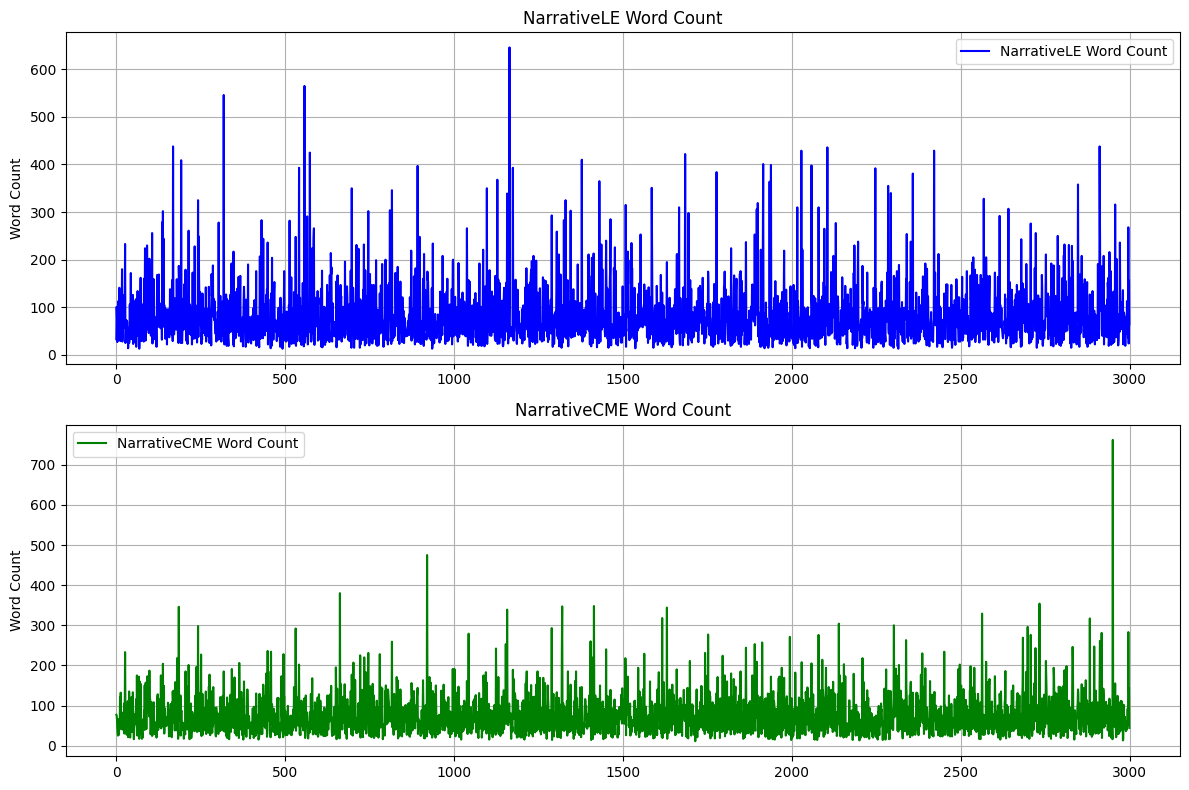

In [7]:
NarrativeLE_count = df_train['NarrativeLE'].apply(lambda x: len(str(x).split()))
NarrativeCME_count = df_train['NarrativeCME'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(NarrativeLE_count, label='NarrativeLE Word Count', color='blue')
plt.ylabel('Word Count')
plt.title('NarrativeLE Word Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(NarrativeCME_count, label='NarrativeCME Word Count', color='green')
plt.ylabel('Word Count')
plt.title('NarrativeCME Word Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

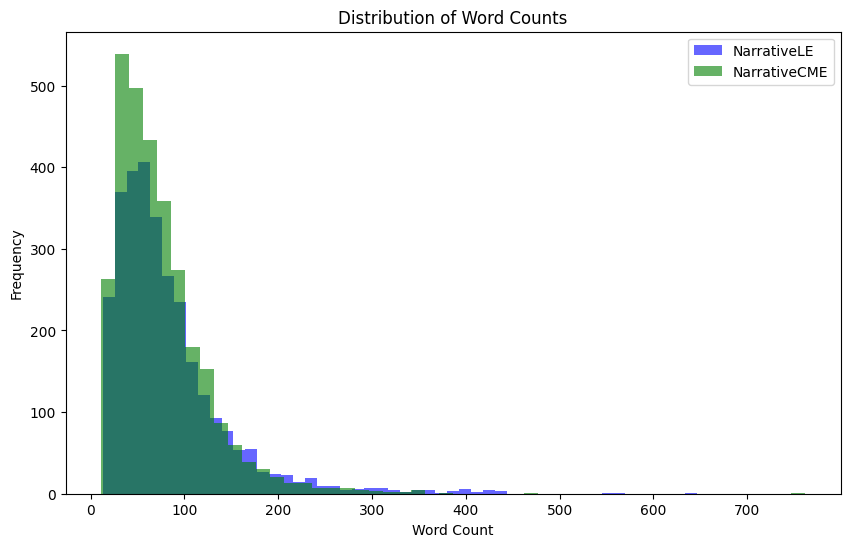

In [8]:
plt.figure(figsize=(10,6))
plt.hist(NarrativeLE_count, bins=50, color='blue', alpha=0.6, label='NarrativeLE')
plt.hist(NarrativeCME_count, bins=50, color='green', alpha=0.6, label='NarrativeCME')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.legend()
plt.show()

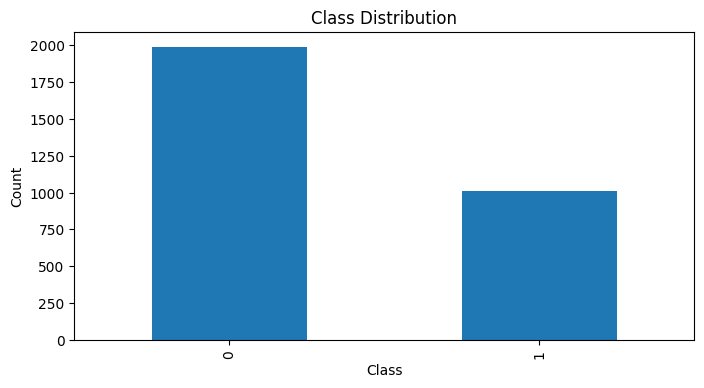

In [9]:
df_train['DepressedMood'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

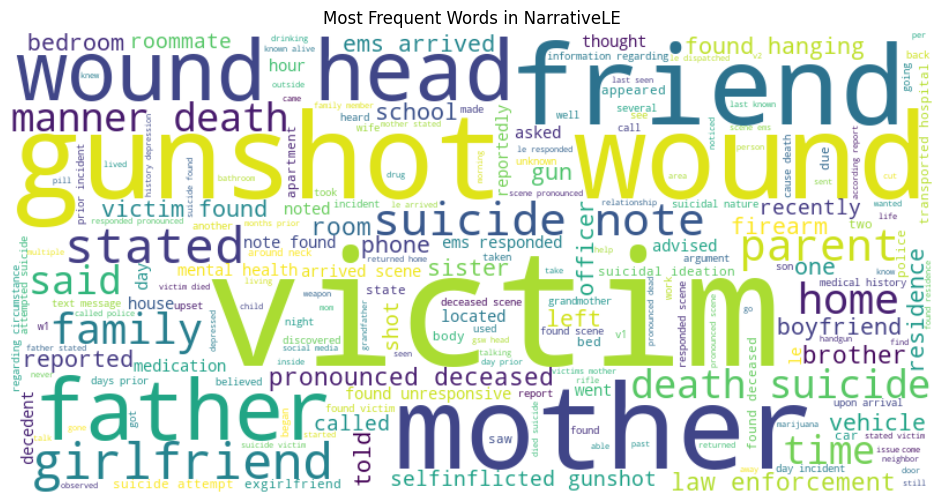

In [10]:
text_all = ' '.join(df_train['NarrativeLE'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in NarrativeLE')
plt.show()

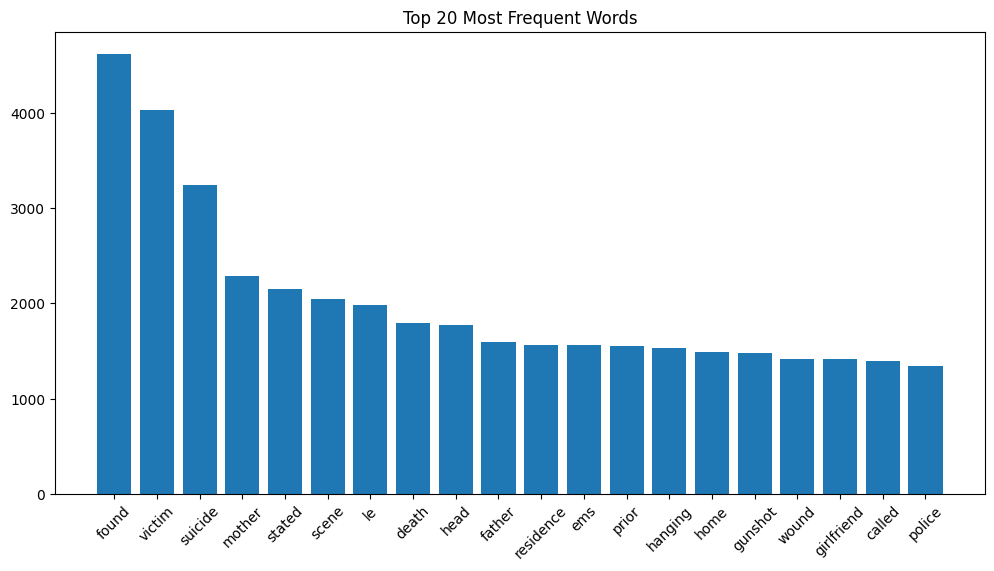

In [11]:
all_words = ' '.join(df_train['NarrativeLE']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.show()

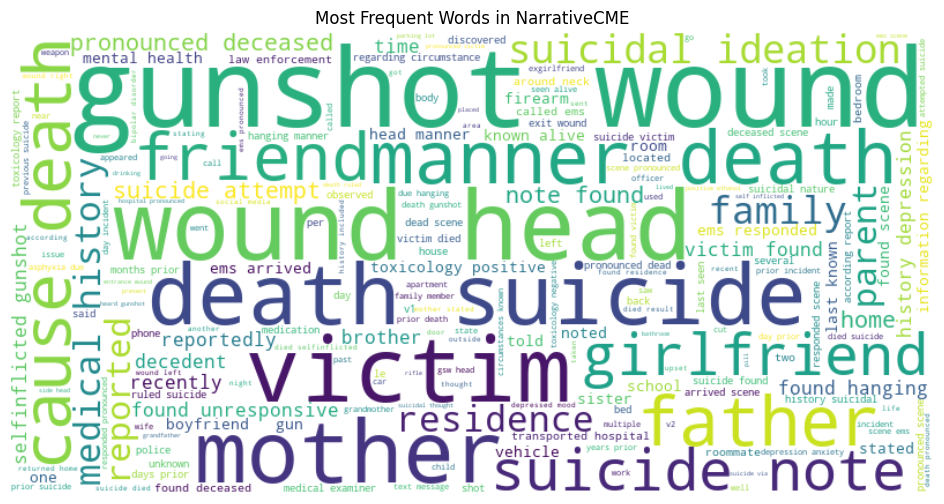

In [12]:
text_all = ' '.join(df_train['NarrativeCME'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in NarrativeCME')
plt.show()

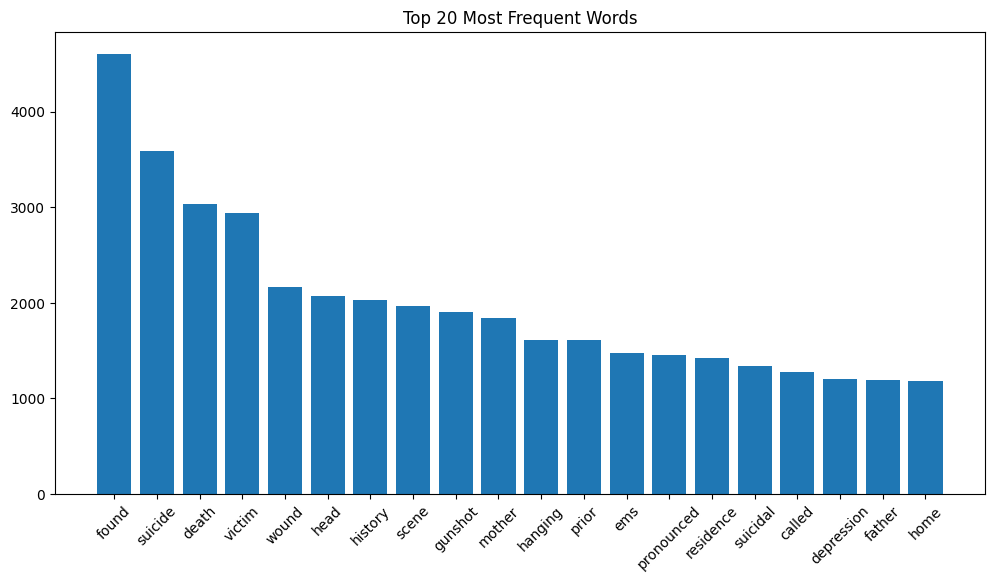

In [13]:
all_words = ' '.join(df_train['NarrativeCME']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.show()

In [14]:
print(df_train['DepressedMood'].value_counts())
print(f'depressedmood for class 0 is {1992 / 3000 * 100}%')
print(f'depressedmood for class 1 is {1008 / 3000 * 100}%')

DepressedMood
0    1992
1    1008
Name: count, dtype: int64
depressedmood for class 0 is 66.4%
depressedmood for class 1 is 33.6%


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    <br>
    شما مجاز هستید از هر مدلی که آموخته‌اید استفاده کنید. به عبارت بهتر، هدف این سوال پیش‌بینی هرچه بهتر متغیر هدف مسئله است!
</font>
</p>

In [15]:
df_train["text"] = (
    df_train["NarrativeLE"].astype(str) + " " +df_train["NarrativeCME"].astype(str)
)
df_train.drop(columns=['NarrativeLE', 'NarrativeCME'], inplace=True)
df_train = df_train[['text'] + [col for col in df_train.columns if col != 'text']]
df_train

,text,DepressedMood
0,found unresponsive hanging residence boyfriend...,0
1,called girlfriend asked come residence somethi...,1
2,died suicide via multiple injuries caused trai...,0
3,police dispatched sick assist possible overdos...,0
4,victim died unspecified causes unspecified wea...,0
...,...,...
2995,found lying bed residence deceased apparent gu...,0
2996,dc notes per police checked motel day prior fo...,0
2997,found hanging rope garage stepfather ems respo...,0
2998,officers responded report suicide progress vic...,1


In [16]:
df_test["text"] = (
    df_test["NarrativeLE"].astype(str) + " " +df_test["NarrativeCME"].astype(str)
)
df_test.drop(columns=['NarrativeLE', 'NarrativeCME'], inplace=True)
df_test

,text
0,found mother hanging nylon rope tree backyard ...
1,found residence unresponsive result gsw head s...
2,found boyfriends residence unresponsive result...
3,found gsw head backyard residence fiance said ...
4,le summary demographics data consistent dc dat...
...,...
495,poisoned garage reportedly depressed due famil...
496,victim died selfintentional gunshot wound head...
497,died suicide via acute combined toxicity bupro...
498,called 911 1330 hours stated tired life gun go...


In [17]:
x = df_train["text"]
y = df_train.iloc[:, -1]   

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words='english',
    sublinear_tf=True
)

x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec  = vectorizer.transform(x_test)

x_train_df = pd.DataFrame(
    x_train_vec.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=x_train.index
)

x_test_df = pd.DataFrame(
    x_test_vec.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=x_test.index
)

print(f"shape of x_train:{x_train_df.shape}, shape of x_test:{x_test_df.shape}")

shape of x_train:(2400, 10000), shape of x_test:(600, 10000)


In [18]:
def clf_ccore(y_true, y_pred,data_name):

    print(f'*********{data_name}*********')
    accuracy = accuracy_score(y_true, y_pred,)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    data = {
        'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
         'Score': [accuracy, recall, precision, f1]
    }
    df_clf = pd.DataFrame(data)
    print(df_clf)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>accuracy</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را برای این ستون <i>DepressedMood </i> جداگانه به دست آورده و آن را اعلام کنید
</font>
</p>

In [ ]:
# evaluate model
models = {
    'LogisticRegression': (LogisticRegression(max_iter=5000), {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    'XGBoost': (XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }),
    'LightGBM': (LGBMClassifier(objective='binary', random_state=42), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    })
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

results_all = []

for model_name, (model, param_grid) in models.items():
    print(f"Running GridSearch for: {model_name}")

    for sampler_name, sampler in samplers.items():
        if sampler is None:
            x_res, y_res = x_train_df, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_df, y_train)
            except Exception as e:
                results_all.append({
                    'Model': model_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        try:
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grid,
                cv=5,
                n_jobs=-1,
            )

            grid_search.fit(x_res, y_res)
            best_model = grid_search.best_estimator_

            y_pred_train = best_model.predict(x_res)
            y_pred_test = best_model.predict(x_test_df)

            results_all.append({
                'Model': model_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,
                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro'),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro'),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro'),
                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro'),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro'),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro')
            })

        except Exception as e:
            results_all.append({
                'Model': model_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df = pd.DataFrame(results_all)
results_df.sort_values(by="Test_Accuracy", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

results_df.head(10)

## LogisticRegression

In [33]:
lr = LogisticRegression(max_iter=5000, C=1, penalty='l1',solver='liblinear')
lr.fit(x_train_df,y_train)
y_pred = lr.predict(x_test_df)
y_pred_train = lr.predict(x_train_df)

clf_ccore(y_test, y_pred, 'test')
clf_ccore(y_train, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.795000
1     Recall  0.738791
2  Precision  0.800562
3   F1 Score  0.753979
*********train*********
      Metric     Score
0   Accuracy  0.801250
1     Recall  0.729488
2  Precision  0.807073
3   F1 Score  0.748274


In [36]:
smote = SMOTE(random_state=42, k_neighbors=4)
x_res, y_res = smote.fit_resample(x_train_df, y_train)

lr = LogisticRegression(max_iter=5000, C=1, penalty='l1', solver='liblinear')
lr.fit(x_res, y_res)

y_pred_test = lr.predict(x_test_df)
y_pred_train = lr.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.791667
1     Recall  0.767239
2  Precision  0.772760
3   F1 Score  0.769780
*********train*********
      Metric     Score
0   Accuracy  0.825748
1     Recall  0.825748
2  Precision  0.829232
3   F1 Score  0.825286


In [37]:
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x_train_df, y_train)

lr = LogisticRegression(max_iter=5000, C=1, penalty='l1', solver='liblinear')
lr.fit(x_res, y_res)

y_pred_test = lr.predict(x_test_df)
y_pred_train = lr.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.780000
1     Recall  0.765707
2  Precision  0.759498
3   F1 Score  0.762236
*********train*********
      Metric     Score
0   Accuracy  0.808292
1     Recall  0.808292
2  Precision  0.810832
3   F1 Score  0.807899


## SVM

In [ ]:
svm = SVC(C=1, kernel='rbf', gamma='auto')
svm.fit(x_train_df,y_train)
y_pred = svm.predict(x_test_df)
y_pred_train = svm.predict(x_train_df)

clf_ccore(y_test, y_pred, 'test')
clf_ccore(y_train, y_pred_train, 'train')

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=4)
x_res, y_res = smote.fit_resample(x_train_df, y_train)

svm = SVC(C=1, kernel='rbf', gamma='auto')
svm.fit(x_res, y_res)

y_pred_test = svm.predict(x_test_df)
y_pred_train = svm.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

In [ ]:
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x_train_df, y_train)

svm = SVC(C=1, kernel='rbf', gamma='auto')
svm.fit(x_res, y_res)

y_pred_test = svm.predict(x_test_df)
y_pred_train = svm.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

## RandomForest

In [50]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=14, max_features='sqrt',random_state=12)
rf.fit(x_train_df,y_train)
y_pred = rf.predict(x_test_df)
y_pred_train = rf.predict(x_train_df)

clf_ccore(y_test, y_pred, 'test')
clf_ccore(y_train, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.653333
1     Recall  0.509434
2  Precision  0.825503
3   F1 Score  0.412827
*********train*********
      Metric     Score
0   Accuracy  0.718750
1     Recall  0.576005
2  Precision  0.851909
3   F1 Score  0.545035


In [44]:
smote = SMOTE(random_state=42, k_neighbors=4)
x_res, y_res = smote.fit_resample(x_train_df, y_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split=2, max_features='log2',random_state=12)
rf.fit(x_res, y_res)

y_pred_test = rf.predict(x_test_df)
y_pred_train = rf.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.625000
1     Recall  0.550647
2  Precision  0.565013
3   F1 Score  0.546978
*********train*********
      Metric     Score
0   Accuracy  0.754052
1     Recall  0.754052
2  Precision  0.765931
3   F1 Score  0.751275


In [43]:
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x_train_df, y_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split=2, max_features='sqrt',random_state=12)
rf.fit(x_res, y_res)

y_pred_test = rf.predict(x_test_df)
y_pred_train = rf.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.723333
1     Recall  0.703706
2  Precision  0.698946
3   F1 Score  0.700994
*********train*********
      Metric     Score
0   Accuracy  0.740648
1     Recall  0.740648
2  Precision  0.743928
3   F1 Score  0.739774


## knn

In [67]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(x_train_df,y_train)
y_pred = knn.predict(x_test_df)
y_pred_train = knn.predict(x_train_df)

clf_ccore(y_test, y_pred, 'test')
clf_ccore(y_train, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.653333
1     Recall  0.541529
2  Precision  0.599580
3   F1 Score  0.510634
*********train*********
      Metric     Score
0   Accuracy  0.737500
1     Recall  0.624839
2  Precision  0.755935
3   F1 Score  0.626587


In [68]:
smote = SMOTE(random_state=42, k_neighbors=4)
x_res, y_res = smote.fit_resample(x_train_df, y_train)

knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(x_res, y_res)

y_pred_test = knn.predict(x_test_df)
y_pred_train = knn.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.380000
1     Recall  0.513130
2  Precision  0.563158
3   F1 Score  0.317172
*********train*********
      Metric     Score
0   Accuracy  0.537718
1     Recall  0.537718
2  Precision  0.721408
3   F1 Score  0.416745


In [70]:
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x_train_df, y_train)

knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(x_res, y_res)

y_pred_test = knn.predict(x_test_df)
y_pred_train = knn.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.603333
1     Recall  0.558500
2  Precision  0.560455
3   F1 Score  0.559123
*********train*********
      Metric     Score
0   Accuracy  0.755923
1     Recall  0.755923
2  Precision  0.761060
3   F1 Score  0.754716


## XGBoost

In [82]:
xgb = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.03,      
    n_estimators=100,
    max_depth=2,             
    subsample=0.6,          
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(x_train_df, y_train)

y_pred = xgb.predict(x_test_df)
y_pred_train = xgb.predict(x_train_df)

clf_ccore(y_test, y_pred, 'test')
clf_ccore(y_train, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.798333
1     Recall  0.738159
2  Precision  0.812067
3   F1 Score  0.754722
*********train*********
      Metric     Score
0   Accuracy  0.805000
1     Recall  0.733559
2  Precision  0.812978
3   F1 Score  0.752904


In [83]:
smote = SMOTE(random_state=42, k_neighbors=4)
x_res, y_res = smote.fit_resample(x_train_df, y_train)

xgb = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.03,      
    n_estimators=100,
    max_depth=2,             
    subsample=0.6,          
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(x_res, y_res)

y_pred_test = xgb.predict(x_test_df)
y_pred_train = xgb.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.801667
1     Recall  0.752504
2  Precision  0.801124
3   F1 Score  0.766446
*********train*********
      Metric     Score
0   Accuracy  0.836035
1     Recall  0.836035
2  Precision  0.844129
3   F1 Score  0.835065


In [84]:
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x_train_df, y_train)

xgb = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.03,      
    n_estimators=100,
    max_depth=2,             
    subsample=0.6,          
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(x_res, y_res)

y_pred_test = xgb.predict(x_test_df)
y_pred_train = xgb.predict(x_res)

clf_ccore(y_test, y_pred_test, 'test')
clf_ccore(y_res, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.783333
1     Recall  0.754377
2  Precision  0.764245
3   F1 Score  0.758616
*********train*********
      Metric     Score
0   Accuracy  0.780237
1     Recall  0.780237
2  Precision  0.791038
3   F1 Score  0.778179


## catboost

In [86]:
cat = CatBoostClassifier(iterations=300,
                         l2_leaf_reg=17,
                         depth=2,
                         learning_rate=0.03, 
                         random_state=7, 
                         verbose=100,
                         use_best_model=True)

train_pool = Pool(x_train_df, y_train)
test_pool = Pool(x_test_df, y_test)

cat.fit(train_pool,eval_set=test_pool)

y_pred = cat.predict(x_test_df)
y_pred_train = cat.predict(x_train_df)

clf_ccore(y_test,y_pred,'test')
clf_ccore(y_train,y_pred_train,'train')

0:	learn: 0.6824475	test: 0.6828503	best: 0.6828503 (0)	total: 19ms	remaining: 5.69s
100:	learn: 0.4796660	test: 0.4957728	best: 0.4957728 (100)	total: 1.68s	remaining: 3.32s
200:	learn: 0.4506228	test: 0.4783716	best: 0.4783716 (200)	total: 3.3s	remaining: 1.63s
299:	learn: 0.4290679	test: 0.4691388	best: 0.4690396 (297)	total: 4.95s	remaining: 0us

bestTest = 0.4690395875
bestIteration = 297

Shrink model to first 298 iterations.
*********test*********
      Metric     Score
0   Accuracy  0.791667
1     Recall  0.733004
2  Precision  0.799100
3   F1 Score  0.748321
*********train*********
      Metric     Score
0   Accuracy  0.810833
1     Recall  0.745200
2  Precision  0.814185
3   F1 Score  0.763905


## answer

In [87]:
xgb = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.03,      
    n_estimators=100,
    max_depth=2,             
    subsample=0.6,          
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(x_train_df, y_train)

y_pred = xgb.predict(x_test_df)
y_pred_train = xgb.predict(x_train_df)

clf_ccore(y_test, y_pred, 'test')
clf_ccore(y_train, y_pred_train, 'train')

*********test*********
      Metric     Score
0   Accuracy  0.798333
1     Recall  0.738159
2  Precision  0.812067
3   F1 Score  0.754722
*********train*********
      Metric     Score
0   Accuracy  0.805000
1     Recall  0.733559
2  Precision  0.812978
3   F1 Score  0.752904


In [94]:
df_test

,text
0,found mother hanging nylon rope tree backyard ...
1,found residence unresponsive result gsw head s...
2,found boyfriends residence unresponsive result...
3,found gsw head backyard residence fiance said ...
4,le summary demographics data consistent dc dat...
...,...
495,poisoned garage reportedly depressed due famil...
496,victim died selfintentional gunshot wound head...
497,died suicide via acute combined toxicity bupro...
498,called 911 1330 hours stated tired life gun go...


In [97]:
df_test_vec = vectorizer.transform(df_test['text'])
df_test_vec_df =pd.DataFrame(
    df_test_vec.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=df_test.index
)
df_test_vec_df

,0030,0030 hours,0100,0100 hours,0130,0130 hours,0200,0200 hours,0300,0300 hours,...,younger,younger brother,younger sister,youre,youth,yrs,yrs ago,zoloft,zolpidem,â½
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|------|---|
|DepressedMood|در آن زمان افسرده بوده یا خیر (۰ یا ۱)|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل یک ستون با اسم <i>DepressedMood</i> است و ۵۰۰ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، مقادیر ستون <i>DepressedMood</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|DepressedMood|
|-----|
|1|
|0|
|0|
|0|
|1|

</font>
</div>



In [98]:
answer = xgb.predict(df_test_vec_df)
answer

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
# predict test samples
submission = pd.DataFrame(answer, columns=['DepressedMood'])
submission


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [ ]:
import zipfile
import os

if not os.path.exists(os.path.join(os.getcwd(), 'Suicide.ipynb')):
    %notebook -e Suicide.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)
            
submission.to_csv('submission.csv', index=False)
file_names = ['Suicide.ipynb', 'submission.csv']
compress(file_names)